In [498]:
# Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [499]:
# Import Dataset 
data=pd.read_csv(r"C:\Users\ASUS\Downloads\Fish.csv")
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [538]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)


In [539]:
data.reset_index(drop=True, inplace=True)
data.head()


,Species,Length1,Length2,Length3,Height,Width,Weight
0,Perch,16.8,18.7,19.4,5.1992,3.1234,78.0
1,Smelt,11.7,12.4,13.5,2.4300,1.2690,13.4
2,Pike,30.0,32.3,34.8,5.5680,3.3756,200.0
3,Whitefish,23.6,26.0,28.7,8.3804,4.2476,270.0
4,Perch,21.0,23.0,24.5,5.2185,3.6260,150.0


In [540]:
data=data[['Species', 'Length1', 'Length2', 'Length3', 'Height','Width','Weight']]

In [541]:
data.columns

Index(['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Weight'],
      dtype='object')

# Data Preparation

In [542]:
# Checking Null values 
data.isnull().sum()

Species    0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
Weight     0
dtype: int64

<Axes: >

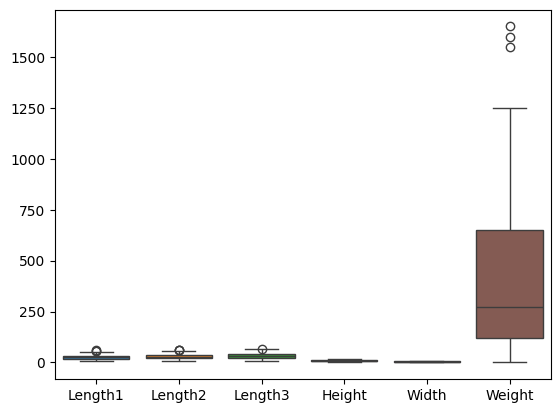

In [543]:
# Checking Outliers
sns.boxplot(data)

In [544]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
 6   Weight   159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [545]:
# First we have to clean the dataset 
# Remove the outliers first 
df = data.copy()
for col in data.columns:
    # Skip the column if d_type =object 
    if data[col].dtype == 'object':
        continue
    
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    up_limit = q3 + 1.5 * iqr
    lo_limit = q1 - 1.5 * iqr
    df = df[(df[col] >= lo_limit) & (df[col] <= up_limit)]




In [546]:
df.head()

,Species,Length1,Length2,Length3,Height,Width,Weight
0,Perch,16.8,18.7,19.4,5.1992,3.1234,78.0
1,Smelt,11.7,12.4,13.5,2.4300,1.2690,13.4
2,Pike,30.0,32.3,34.8,5.5680,3.3756,200.0
3,Whitefish,23.6,26.0,28.7,8.3804,4.2476,270.0
4,Perch,21.0,23.0,24.5,5.2185,3.6260,150.0


<Axes: >

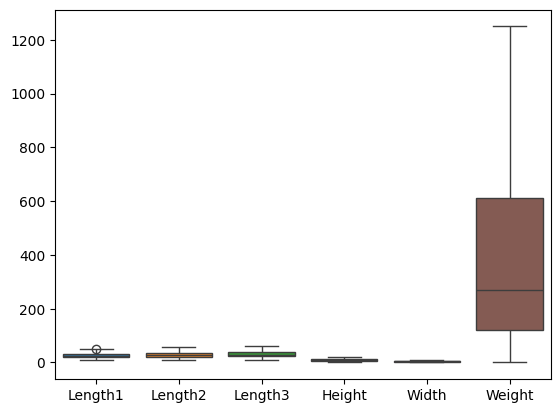

In [547]:
sns.boxplot(df)

# Pipeline to clean the column 

In [634]:
x=df.iloc[:,:-1]
y=df["Weight"]

In [658]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [659]:
x_train.head()

,Species,Length1,Length2,Length3,Height,Width
56,Smelt,10.8,11.3,12.6,1.9782,1.2852
141,Roach,17.5,18.8,21.2,5.5756,2.9044
126,Pike,44.8,48.0,51.2,7.6800,5.3760
131,Perch,26.9,28.7,30.1,7.5852,4.6354
130,Roach,29.5,31.7,35.0,9.4850,5.3550


In [660]:
data['Species'].unique()

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Bream', 'Roach', 'Parkki'],
      dtype=object)

In [661]:
split = int(0.8 * len(data))
train_data = data.iloc[:split]
test_data  = data.iloc[split:]


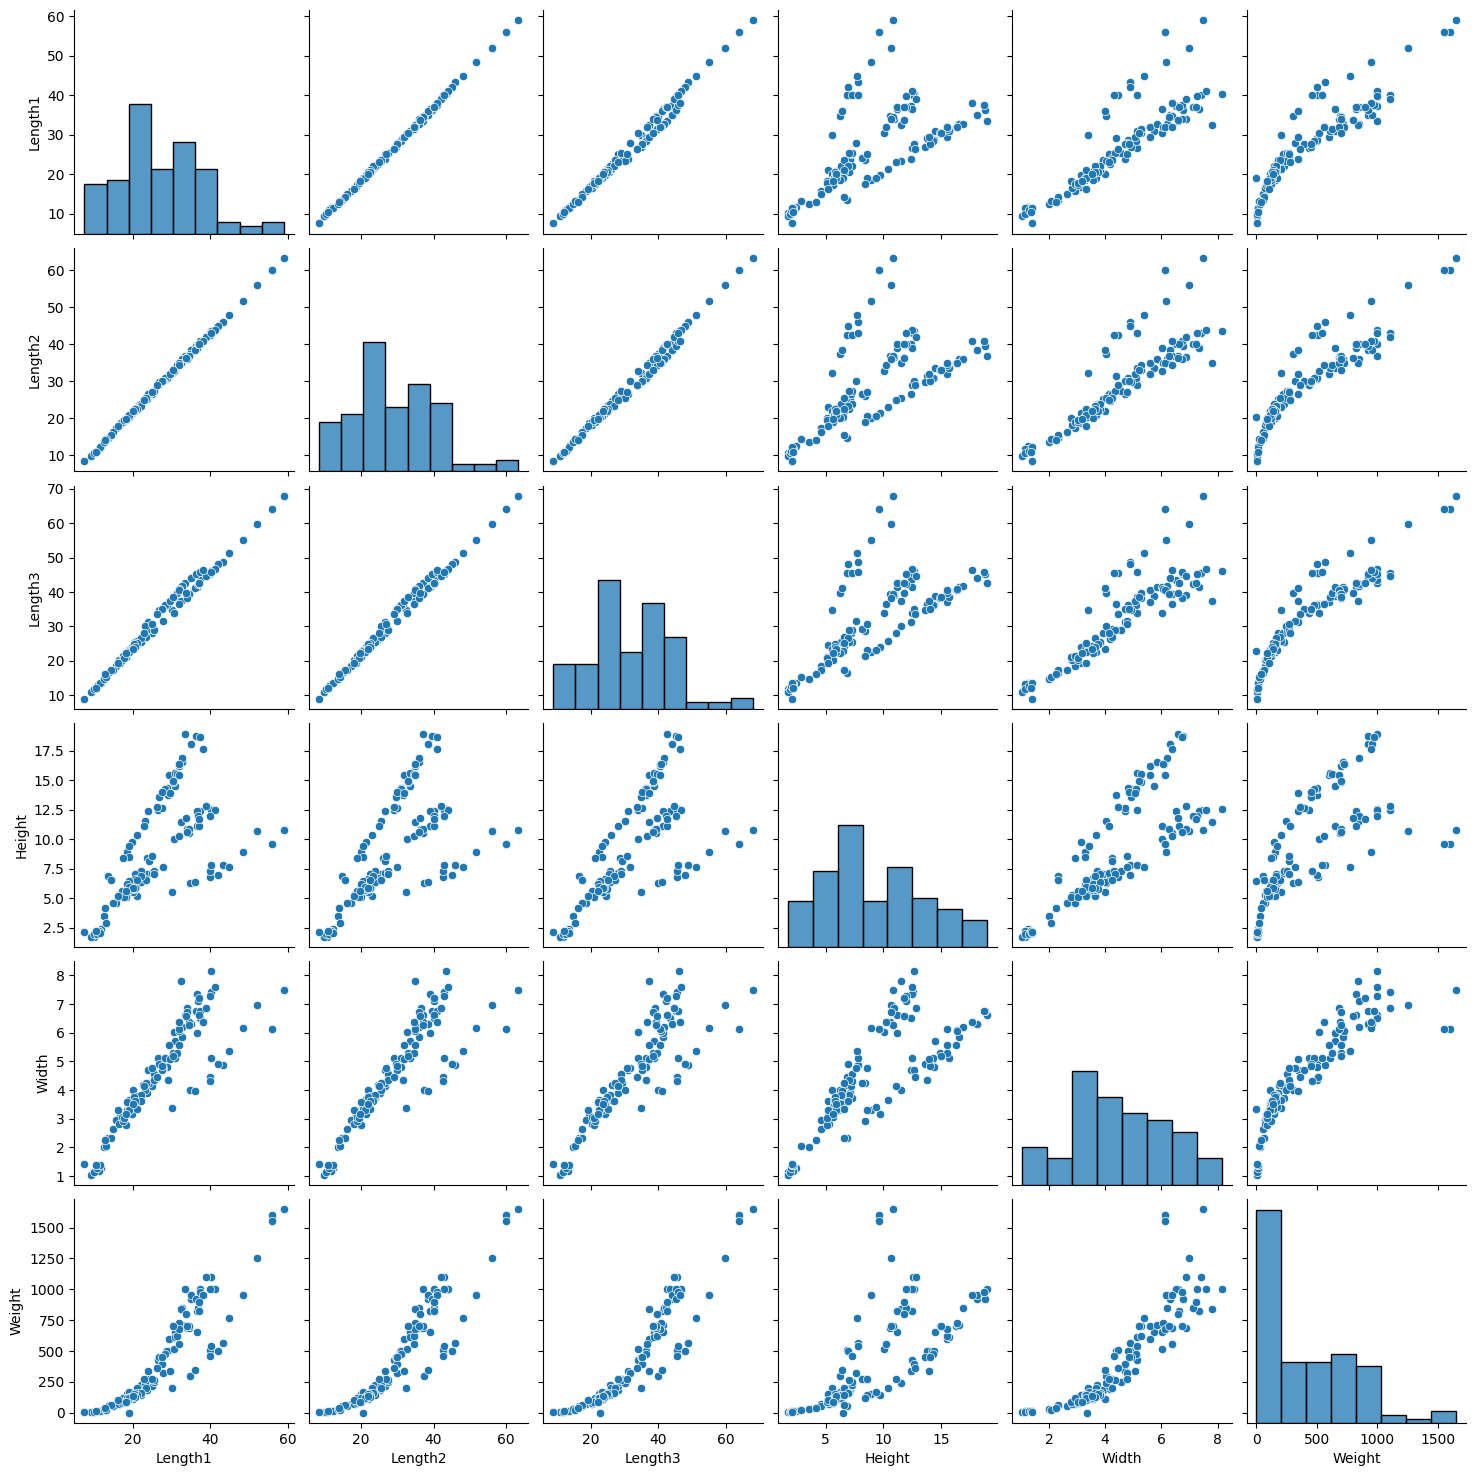

In [639]:
# Checking which model is best for this dataset 
sns.pairplot(train_data)

# According to this pairplot i conclude that if we predict the weight of the Species according to its length and all of the things then we can say that we can apply Polynomial Regression 

<Axes: >

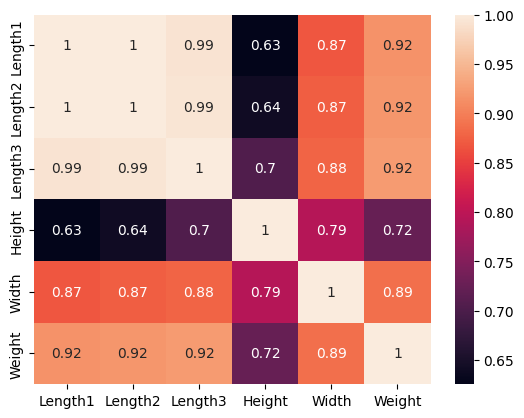

In [582]:
# Also Check the correlation between all of the columns 
sns.heatmap(data.drop(columns='Species').corr(), annot=True)


In [662]:
data["Species"].unique()

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Bream', 'Roach', 'Parkki'],
      dtype=object)

In [688]:
x_test.head()

,Species,Length1,Length2,Length3,Height,Width
97,Roach,25.0,27.0,30.6,8.5680,4.7736
69,Perch,36.5,39.0,41.4,11.1366,6.0030
83,Smelt,11.5,12.2,13.4,2.0904,1.3936
76,Bream,31.8,35.0,40.9,16.3600,6.0532
117,Bream,27.6,30.0,35.1,14.0049,4.8438


In [663]:
# Fill the null values 
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
trf1=ColumnTransformer(transformers=[('remove_null_values',SimpleImputer(),[1,2,3,4,5]),('Species',SimpleImputer(strategy='most_frequent'),[0])],remainder='passthrough')                   

In [664]:
# Perform one hot encoding in the column Species 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
trf2=ColumnTransformer(transformers=[('Species',OneHotEncoder(handle_unknown='ignore', sparse_output=False),[5])],remainder='passthrough')


In [704]:
# Min Max Scalar 
from sklearn.preprocessing import StandardScaler
trf3=ColumnTransformer(transformers=[('Standard_Scalar',StandardScaler(),[0,1,2,3,4,5,6,7,8,9,10,11])],remainder='passthrough')


In [728]:
# Fifth column of the pipeline 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
trf4=ColumnTransformer(transformers=[('polynomial_feature',PolynomialFeatures(degree=1),[0,1,2,3,4,5,6,7,8,9,10,11])])



In [729]:
# Now in this column apply Linear Regression '
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
trf6=LinearRegression()

In [730]:
from sklearn.pipeline import Pipeline,make_pipeline
#pipe=Pipeline('trf1',trf1,'trf2',trf2,'trf3',trf3,'trf4',trf4,'trf5',trf5,'trf6',trf6)
pipe_new=make_pipeline(trf1,trf2,trf3,trf4,trf6)

In [731]:
pipe_new.fit(x_train,y_train)

,steps,"[('columntransformer-1', ...), ('columntransformer-2', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('remove_null_values', ...), ('Species', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [732]:
pipe_new.score(x_train,y_train)*100

94.65190469701889

In [733]:
pipe_new.score(x_test,y_test)*100

93.67817529608644

In [734]:
pipe_new.predict(x_test)

array([ 342.61965628,  760.50084147,   17.18306401,  714.86997405,
        488.42729907,    7.17199155,  215.14946016,  207.51846373,
        116.96797544,   -2.09500755,  591.83484   ,    5.80616081,
        859.93844391,  447.29776443,  862.59326976,  486.35909412,
        398.43132493, -158.22371393,  363.56526222,  721.84473225,
        726.87736403,  252.86582543,  617.55835291,  972.35274305,
         -6.00583315,  891.01518646,  269.59064713,  731.99208135,
        520.0718464 ,  463.90307712,  -19.7378392 ,  -96.22865009])

In [735]:
y_pred=pd.DataFrame(pipe_new.predict(x_test),columns=['y_pred'])

In [736]:
y_pred["y_test"]=y_test.values
y_pred

,y_pred,y_test
0,342.619656,272.0
1,760.500841,650.0
2,17.183064,12.2
3,714.869974,725.0
4,488.427299,450.0
5,7.171992,9.9
6,215.149460,145.0
7,207.518464,169.0
8,116.967975,19.7
9,-2.095008,9.8


# Outputs 

In [737]:
 # Now i am checking the Output 
c=trf1.fit_transform(x_train,y_train)
c=pd.DataFrame(c)
c

,0,1,2,3,4,5
0,10.8,11.3,12.6,1.9782,1.2852,Smelt
1,17.5,18.8,21.2,5.5756,2.9044,Roach
2,44.8,48.0,51.2,7.68,5.376,Pike
3,26.9,28.7,30.1,7.5852,4.6354,Perch
4,29.5,31.7,35.0,9.485,5.355,Roach
...,...,...,...,...,...,...
119,20.5,22.0,24.3,6.6339,3.5478,Roach
120,27.6,30.0,35.0,12.67,4.69,Bream
121,31.9,35.0,40.5,16.2405,5.589,Bream
122,14.3,15.5,17.4,6.5772,2.3142,Parkki


In [738]:
x_test["Species"].unique()

array(['Roach', 'Perch', 'Smelt', 'Bream', 'Pike'], dtype=object)

In [739]:
m=trf2.fit_transform(c)
n=pd.DataFrame(m)
n


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.8,11.3,12.6,1.9782,1.2852
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17.5,18.8,21.2,5.5756,2.9044
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,44.8,48.0,51.2,7.68,5.376
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,26.9,28.7,30.1,7.5852,4.6354
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29.5,31.7,35.0,9.485,5.355
...,...,...,...,...,...,...,...,...,...,...,...,...
119,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.5,22.0,24.3,6.6339,3.5478
120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27.6,30.0,35.0,12.67,4.69
121,1.0,0.0,0.0,0.0,0.0,0.0,0.0,31.9,35.0,40.5,16.2405,5.589
122,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.3,15.5,17.4,6.5772,2.3142


In [740]:
c=trf3.fit_transform(n)
d=pd.DataFrame(c)
d

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.477203,-0.312002,-0.794719,-0.312002,-0.384900,3.574602,-0.225494,-1.679192,-1.738552,-1.734700,-1.681930,-1.878842
1,-0.477203,-0.312002,-0.794719,-0.312002,2.598076,-0.279751,-0.225494,-0.917773,-0.943130,-0.895217,-0.792647,-0.900749
2,-0.477203,-0.312002,-0.794719,3.205110,-0.384900,-0.279751,-0.225494,2.184728,2.153711,2.033210,-0.272437,0.592245
3,-0.477203,-0.312002,1.258306,-0.312002,-0.384900,-0.279751,-0.225494,0.150488,0.106826,-0.026450,-0.295871,0.144878
4,-0.477203,-0.312002,-0.794719,-0.312002,2.598076,-0.279751,-0.225494,0.445964,0.424995,0.451859,0.173762,0.579560
...,...,...,...,...,...,...,...,...,...,...,...,...
119,-0.477203,-0.312002,-0.794719,-0.312002,2.598076,-0.279751,-0.225494,-0.576839,-0.603751,-0.592613,-0.531034,-0.512097
120,2.095544,-0.312002,-0.794719,-0.312002,-0.384900,-0.279751,-0.225494,0.230039,0.244699,0.451859,0.961099,0.177860
121,2.095544,-0.312002,-0.794719,-0.312002,-0.384900,-0.279751,-0.225494,0.718711,0.774980,0.988738,1.843732,0.720910
122,-0.477203,3.205110,-0.794719,-0.312002,-0.384900,-0.279751,-0.225494,-1.281436,-1.293116,-1.266151,-0.545050,-1.257265


In [741]:
o=trf4.fit_transform(d)
p=pd.DataFrame(o)
p

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,-0.477203,-0.312002,-0.794719,-0.312002,-0.384900,3.574602,-0.225494,-1.679192,-1.738552,-1.734700,-1.681930,-1.878842
1,1.0,-0.477203,-0.312002,-0.794719,-0.312002,2.598076,-0.279751,-0.225494,-0.917773,-0.943130,-0.895217,-0.792647,-0.900749
2,1.0,-0.477203,-0.312002,-0.794719,3.205110,-0.384900,-0.279751,-0.225494,2.184728,2.153711,2.033210,-0.272437,0.592245
3,1.0,-0.477203,-0.312002,1.258306,-0.312002,-0.384900,-0.279751,-0.225494,0.150488,0.106826,-0.026450,-0.295871,0.144878
4,1.0,-0.477203,-0.312002,-0.794719,-0.312002,2.598076,-0.279751,-0.225494,0.445964,0.424995,0.451859,0.173762,0.579560
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1.0,-0.477203,-0.312002,-0.794719,-0.312002,2.598076,-0.279751,-0.225494,-0.576839,-0.603751,-0.592613,-0.531034,-0.512097
120,1.0,2.095544,-0.312002,-0.794719,-0.312002,-0.384900,-0.279751,-0.225494,0.230039,0.244699,0.451859,0.961099,0.177860
121,1.0,2.095544,-0.312002,-0.794719,-0.312002,-0.384900,-0.279751,-0.225494,0.718711,0.774980,0.988738,1.843732,0.720910
122,1.0,-0.477203,3.205110,-0.794719,-0.312002,-0.384900,-0.279751,-0.225494,-1.281436,-1.293116,-1.266151,-0.545050,-1.257265


In [742]:
m=trf6.fit(p,y_train)
m

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [743]:
m.score(p,y_train)

0.946519046970189

In [715]:
pd.DataFrame(m.predict(p))

,0
0,6.991508
1,75.452650
2,723.154027
3,320.536552
4,406.105992
...,...
119,109.872332
120,369.506074
121,714.927516
122,67.068853
